In [1]:
%matplotlib inline
%pylab inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from gensim.models import KeyedVectors

from inforet_package.preprocessing import *
from inforet_package.ensembler import *
from inforet_package.plotting import *
from inforet_package.vectorizer import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
#loading data
df = pd.read_csv("../data/train.csv")
print("{} rows loaded...".format(df.shape[0]))
df = df.sample(frac=0.05)
print("{} rows sampled...".format(df.shape[0]))

1306122 rows loaded...
65306 rows sampled...


In [3]:
#Building terms features
questions = cleaning_questions(df)
tfidf_vocab, TfIdfMatrix, idf_dict = idf_dictionary_builder(questions)
cleaned_questions = clean_stopwords(questions, idf_dict, 10)

#vectorizing
vectorizer = TfidfVectorizer(preprocessor=lambda x: x, tokenizer=lambda x: x)
X_terms = vectorizer.fit_transform(cleaned_questions)
X_terms

<65306x39118 sparse matrix of type '<class 'numpy.float64'>'
	with 71446 stored elements in Compressed Sparse Row format>

In [10]:
y_pred, y_test = train_predict_svm(X_terms, df['target'], C=1)

[LibSVM]

Normalized confusion matrix
Precision: 0.3564356435643564
Recall: 0.029149797570850202
F1 score: 0.053892215568862284


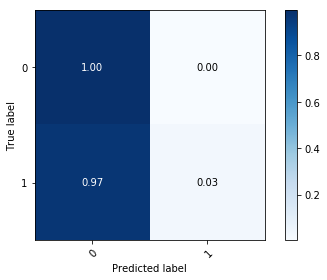

In [11]:
norm_ax, cm = plot_confusion_matrix(y_test, y_pred, [0,1],
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues)
print_performances(cm)

In [5]:
EMBEDDINGS = '../data/embeddings/GoogleNews-vectors-negative300/GoogleNews-vectors-negative300.bin'
embeddings_index = KeyedVectors.load_word2vec_format(EMBEDDINGS, binary=True)

In [5]:
embd = MeanEmbeddingVectorizer(embeddings_index)
X_embedded = embd.transform(questions)

In [10]:
y_pred_em, y_test_em = train_predict_svm(X_embedded, df['target'], C=1)

[LibSVM]

Normalized confusion matrix
Precision: 0.664179104477612
Recall: 0.14710743801652892
F1 score: 0.2408660351826793


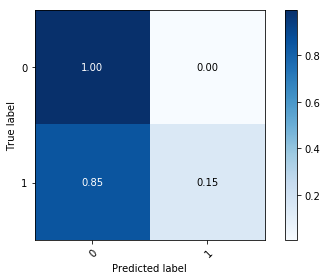

In [11]:
norm_ax, cm = plot_confusion_matrix(y_test_em, y_pred_em, [0,1],
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues)
print_performances(cm)

In [6]:
tfidfembd = TfidfEmbeddingVectorizer(embeddings_index)
tfidfembd.fit(questions, _)
X_tfidfembedded = tfidfembd.transform(questions)

In [7]:
y_pred_tfidfem, y_test_tfidfem = train_predict_svm(X_tfidfembedded, df['target'], C=1)

[LibSVM]

Normalized confusion matrix
Precision: 0.7592592592592593
Recall: 0.03513281919451585
F1 score: 0.06715806715806716


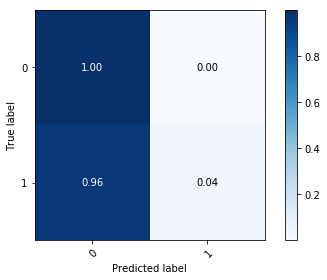

In [10]:
norm_ax, cm = plot_confusion_matrix(y_test_tfidfem , y_pred_tfidfem, [0,1],
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues)
print_performances(cm)